# Линейная регрессия

In [1]:
from collections import defaultdict

import numpy as np
from matplotlib import pyplot as plt

import torch
from torch import nn
from torch.autograd import Variable

Данные содержатся в файле `data/lin_reg.txt`. Прочитать их можно следующим так:

In [2]:
D = np.loadtxt('lin_reg.txt', delimiter=',')
X = D[:, :-1]
y = D[:, -1]
y = np.reshape(y, [len(y), 1])
X = (X - np.mean(X)) / np.std(X)
X = np.hstack([X, np.ones((X.shape[0], 1))])

При выполнении заданий **нельзя** пользоваться `scikit-learn` и т.п., только `NumPy`/`JAX`/`TF`/`PyTorch` и `matplotlib`/`seaborn`/`plotly`/etc.

1. Нарисуйте график среднеквадратичной ошибки в зависимости от параметра регуляризации $\alpha$, используя полные данные для обучения и для тестирования. 
2. Подготовьте исходные данные для 5 fold CV.
3. С помощью CV найдите оптимальное значение $\alpha$ на какой-нибудь сетке значений.
4. Постройте валидационную кривую. 
5. Постройте кривую обучения.

## Релизация Линейной Регрессии

In [3]:
class Linear_Regression:
    def __init__(self, alpha, NUM_STEPS):
        self.alpha = alpha # learning rate
        self.num_steps = NUM_STEPS
        self.mse = []
        
    def fit(self, X, y):
        self.w = np.random.rand(X.shape[1], 1) # инициализация вектора весов
        # размерность w получаем из равенства y = (X, w) при известных размерностях y и X
        self.X =  X
        self.y = y
        
        for _ in range(self.num_steps):
            self.update_weights()
        
    def fit_plot(self, X_train, y_train, X_test, y_test):
        self.w = np.random.rand(X.shape[1], 1) # инициализация вектора весов
        # размерность w получаем из равенства y = (X, w) при известных размерностях y и X
        self.X =  X
        self.y = y
        val_loss = []
        for step in range(self.num_steps):
            self.update_weights()   
            pred = self.predict(X_test)
            val_loss.append(self.loss_func(pred, y_test))
           
        plt.plot(self.mse, label = "train_curve")
        plt.plot(val_loss, label = "val_curve")
        plt.show()
    def update_weights(self):
        """
        Градиентный спуск
        """
        y_pred = self.predict(self.X)        
        self.errors = y_pred - self.y
        grad = 2 * self.X.T.dot(self.errors) / len(self.X) 
        self.w0 = self.w.copy()
        self.w -= self.alpha * grad
        self.mse.append(self.loss_func(y_pred, self.y))

    def loss_func(self, y_pred, y):
        return (np.power(y_pred - y, 2)).mean()
        
    def predict(self, X):
        return X.dot(self.w)
    
    def MSE(self):
        return self.mse[len(self.mse)-1]

## 2. Подготовка данных для Кросс Валидации

In [4]:
def CV(X, y):
    ind = np.arange(0, len(X), 1)
    mse_list = []
    mse_val_list = []
    for alpha in np.arange(0.01, 0.3, 0.001)[::-1]:
        mse_temp = []
        mse_val_temp = []
        for i in range(5):
            start = len(X) // 5 * i
            stop = len(X) // 5 * (i + 1)
            test_ind = ind[start:stop]
            X_test = X[test_ind]
            y_test = y[test_ind]
            train_ind = list(set(ind) - set(test_ind))
            X_train = X[train_ind]
            y_train = y[train_ind]
            model = Linear_Regression(alpha=alpha, NUM_STEPS=10000)
            model.fit(X_train, y_train)
            mse_temp.append(model.MSE())
            pred = model.predict(X_test)
            mse_val_temp.append(model.loss_func(pred, y_test))
        mse_list.append(np.mean(mse_temp))
        mse_val_list.append(np.mean(mse_val_temp))
        
    return mse_list, mse_val_list

mse_list, mse_val_list = CV(X, y)

## 1. График зависимости MSE от параметра регуляризации

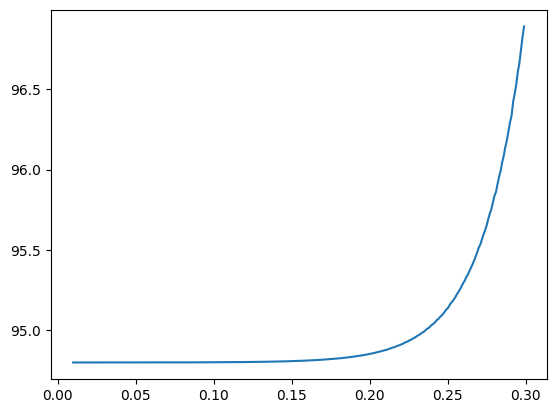

In [5]:
plt.plot(np.arange(0.01, 0.3, 0.001), mse_list, label = 'MSE error')
plt.show()

## 3. Оптимальный параметр регуляризации

In [6]:
best_alpha = np.arange(0.01, 0.3, 0.001)[np.argmin(mse_val_list)]
best_alpha

0.08699999999999992

## 4. Валидационная кривая

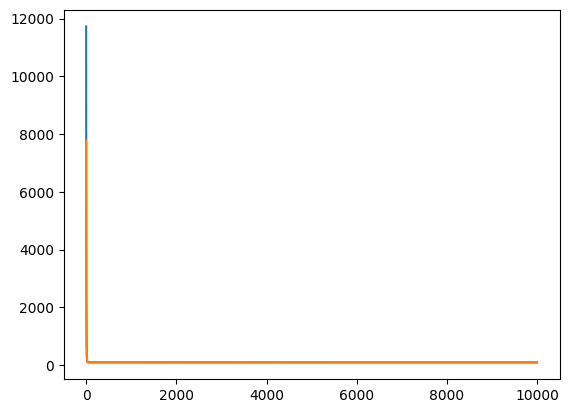

In [7]:
lr = Linear_Regression(best_alpha, NUM_STEPS=10000)
X_train, y_train = X[:900], y[:900]
X_test, y_test = X[900:], y[900:]
lr.fit_plot(X_train, y_train, X_test, y_test)